In [7]:
%load_ext autoreload
%autoreload 2



In [92]:
import matplotlib.pyplot as plt
import os
from magnons.process import Process
from magnons.spin import get_spincurrent_dispersion, get_spincurrent, plot_spincurrent_dispersion
from magnons.yig import S, J
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

In [2]:
p = Process('.')

In [3]:
values = [[kvalues, E, ev, attrs] for kvalues, E, ev, attrs in p.get_all()]

In [5]:
i=2
kvalues, E, ev = values[i][0], values[i][1], values[i][2]

In [58]:
kabs = np.sqrt(np.sum(kvalues**2, axis=1))

In [53]:
current = get_spincurrent_dispersion(ev, S=S, J=J)

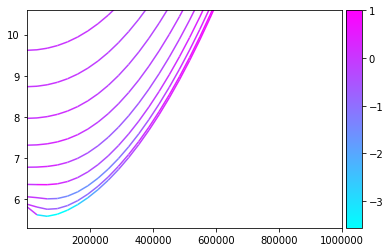

In [97]:
plot_spincurrent_dispersion(kvalues, E, ev)

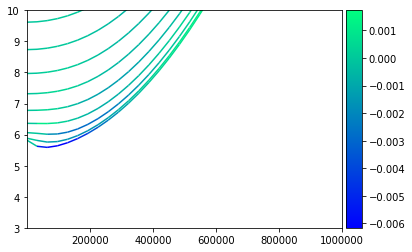

In [90]:
N = len(kabs)
# Here are many sets of y to plot vs x
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
norm = plt.Normalize(current.min(), current.max())
cmap = mpl.cm.get_cmap('winter')
# for i in range(E.shape[-1]):
for i in range(10):
    y_points = E[:,i]
    c = current[:,i]
    points = np.array([kabs, y_points]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(c)
    ax.add_collection(lc)

ax.set_xlim(kabs.min(), kabs.max())
ax.set_ylim(3,10)
ax_cb = divider.append_axes('right', size='5%', pad=0.05)
mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm, orientation='vertical')

In [72]:
np.array([x + i for i in np.arange(N)]).shape

(32, 32)

In [70]:
E.shape

(32, 400)